In [170]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [307]:
def getDistCityAirport(city, airport):
    '''
    Returns the distance between a city and an aiport using the euclidean distance
    '''
    return (airport[0] - city[0])**2 + (airport[1] - city[1])**2

In [306]:
class Cluster:
    """
    A cluster is defined by a set of cities and the relative nearest airport
    
    """
    
    def __init__(self, airport):
        self.cities = list() # list of tuples that contains all cities coordinates in the cluster
        self.airport = airport # tuple of coordinate for the airport
        self.cost = 0 # global cost of the cluster

    
    def addCities(self,city):
        self.cities.append(city)
    
    def getCities(self):
        return self.cities

    def getAirport(self):
        return self.airport

    def setAirport(self, newAirport):
        self.airport = newAirport

    def computeCost(self):
        cost = 0
        for city in self.cities :
            cost += getDistCityAirport(city, self.airport)
            
        self.cost = cost

    def getCost(self):
        return self.cost


In [305]:
def assignCluster(airports, cities):
    """Assign the cities and airports to their relative cluster
    
    Keyword arguments:
    airports -- list of all airports
    cities -- list of all cities
    Return: clusters a list of cluster's instances
    """
    
    clusters = list()
    for i in airports :
        clusters.append(Cluster(i))
    
    for city in cities :

        # create a dict that will contain the distance from city to airport
        distCityAirports = dict()    
    
        for airport in airports :
            # compute the distance between the city and the airport
            distCityAirports[airport] = getDistCityAirport(city, airport)
        
        # sort the computed distances
        distCityAirports = dict(sorted(distCityAirports.items(), key=lambda item: item[1]))
        # keep in a list the associated airports
        sortedAirports = list(distCityAirports.keys())

        for cluster in clusters :
            
            if cluster.getAirport() == sortedAirports[0] :
                # add the city to its proper cluster according to the shorstest distance to the airport
                cluster.addCities(city)
                
    return clusters


In [330]:
def nearestAirport(airports, cities, clusters = None):
    """"Compute the relative cost of each cluster
    
    Keyword arguments:
    airports -- the list of all airports (only for the initialization of the clusters)
    cities -- list of all cities (only for the initialization of the clusters)
    clusters -- default value = None, the list of cluster's instances
    Return: clusters, a list of cluster's instances with their relative computed cost
    """
    if clusters == None :
        # initialize the clusters : assign each city and airport to its cluster
        clusters = assignCluster(airports, cities)

    # for each cluster update the actual cost 
    for cluster in clusters :
        cluster.computeCost()
            
    return clusters
        

In [303]:
def partialDerivate(cluster):
    """compute the partial derivate of the objective function on a specific cluster
    
    Keyword arguments:
    cluster -- an instance of the class Cluster
    Return: the sum of partial derivates of the objective function for the considered cluster
    """
    
    partialX = 0
    partialY = 0

    for city in cluster.getCities() :
        clusterAirport = cluster.getAirport()
        x = clusterAirport[0] - city[0]
        y = clusterAirport[1] - city[1]

        partialX += x
        partialY += y

    return (2 * partialX , 2 * partialY)

In [302]:
def gradient(clusters):
    """compute the gradient descent on each cluster, and update the cluster's airport coordinates
    
    Keyword arguments:
    clusters -- list of cluster's instances
    """
    
    lr = 0.01 # set the learning rate
    
    for cluster in clusters :
        ClusterAirport = cluster.getAirport()
        partial = partialDerivate(cluster) 
        
        newx = ClusterAirport[0] - (lr * partial[0])
        newy = ClusterAirport[1] - (lr * partial[1])
        cluster.setAirport((newx,newy))
        

In [301]:
def getGlobalCost(clusters):
    """Compute the global objective function of the current state
    
    Keyword arguments:
    clusters -- list of cluster's instance
    Return: globalCost, the overall cost of the state
    """
    
    globalCost = 0
    for cluster in clusters :
        globalCost += cluster.getCost()
    return globalCost

In [324]:
def plotMap(cities, airports):
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    
    zip_airs = zip(*airports)
    plt.title("Final Position of airports")
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
    plt.show()
    plt.close()

def plotEpochInfo(epochs,nb_epoch):
    zip_epochs = zip(*epochs)
    plt.scatter(*zip_epochs, color='b', s=50)
    plt.xlabel("Epoch")
    plt.ylabel("Objective")
    plt.title("Objective Function, Epoch " + str(nb_epoch))
    plt.show()
    plt.close()

In [326]:
def gradientDescent(cities, airports):
    """Compute the gardient based algorithm on the n-airport problem
    
    Keyword arguments:
    cities -- a list of all the cities defined for the problem
    airports -- a list of all the airports for which the coordinates need to be update 
    """
    
    epoch = 0
    iterations = []

    #initialize the clusters and compute their costs
    clusters = nearestAirport(airports, cities)

    # Initialize the first data point
    iterations.append((epoch, getGlobalCost(clusters)))

    while iterations[len(iterations) - 1][1] < iterations[len(iterations) - 2][1] or epoch == 0:
        
        epoch += 1
        #compute the gradient to change the airport position
        gradient(clusters)

        #update the cost of each cluster
        nearestAirport(cities, airports, clusters)

        # collect the iteration information (epoch and cost)
        iterations.append((epoch, getGlobalCost(clusters)))

        # plot the final positions of the airports
        if iterations[len(iterations) - 2][1] <= iterations[len(iterations)- 1][1]:

            finalAirportPosition = list()
            for cluster in clusters :
                finalAirportPosition.append(cluster.getAirport())
            

            plotMap(cities, finalAirportPosition)

    plotEpochInfo(iterations,epoch)
        

In [327]:
def main():
    num_city = 100
    num_air = 3
    num_center = 5 
    sigma = 0.1
    cities = set()
    airports = []

    for i in range(num_center):
        x = random.random()
        y = random.random()
        xc = np.random.normal(x, sigma, num_city//num_center)
        yc = np.random.normal(y, sigma, num_city//num_center)
        cities = cities.union(zip(xc, yc))


    for i in range(num_air):
        x = random.random()
        y = random.random()
        airports.append((x,y)) 

    import matplotlib.pyplot as plt

    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    zip_airs = zip(*airports)
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
    plt.legend()
    plt.show()

    gradientDescent(cities, airports)

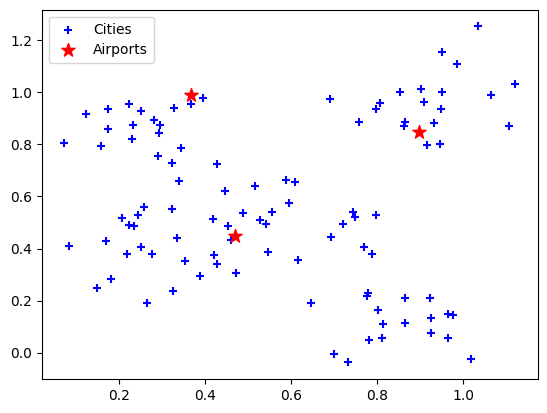

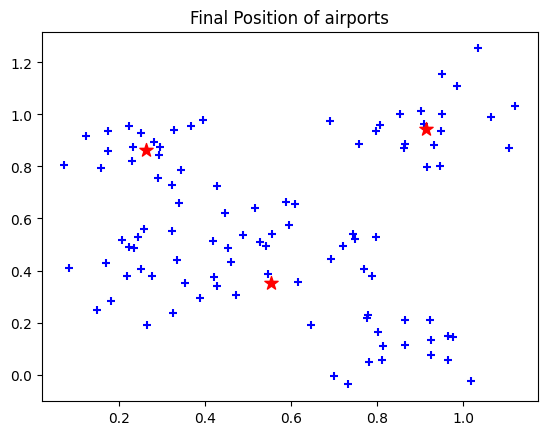

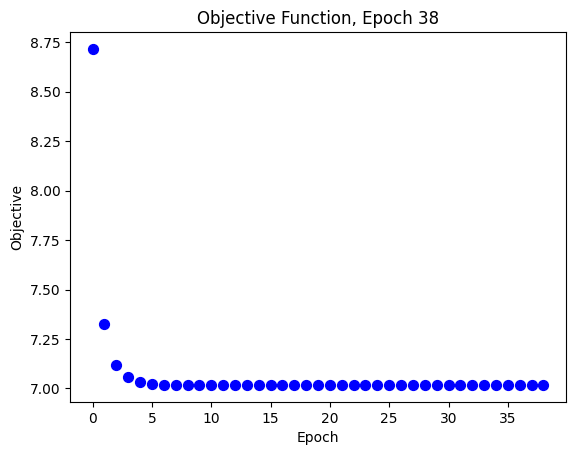

In [331]:
main()